In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/lin/Documents/Tripadvisor_data/Tripadvisor_data.csv')
df.shape

(16930, 16)

In [3]:
df.head()

,res_id,review,reviewRating,comment,helpful,arriving time,review time,restaurantName,link,cuisine,restaurantRating,address,from,tel,coordinate,description
0,1,"I came here with some friends the other night,...",5,1,0,Feb-20,4 days ago,Le Noir Bar & Lounge,https://www.tripadvisor.com.sg/Restaurant_Revi...,"International, Bar",5.0,2 Bayfront Avenue #01-84 Marina Bay Sands The ...,0.8 km from Marina Bay,+65 8817 6229,"1.284573,103.858925",DetailsPRICE RANGES$10 - S$21CUISINESInternati...
1,1,Wonderful atmosphere very small place . Excell...,5,162,47,Feb-20,1 week ago,Le Noir Bar & Lounge,https://www.tripadvisor.com.sg/Restaurant_Revi...,"International, Bar",5.0,2 Bayfront Avenue #01-84 Marina Bay Sands The ...,0.8 km from Marina Bay,+65 8817 6229,"1.284573,103.858925",DetailsPRICE RANGES$10 - S$21CUISINESInternati...
2,1,"Nice services, good meal. Small place, but int...",4,0,0,Feb-20,2 weeks ago,Le Noir Bar & Lounge,https://www.tripadvisor.com.sg/Restaurant_Revi...,"International, Bar",5.0,2 Bayfront Avenue #01-84 Marina Bay Sands The ...,0.8 km from Marina Bay,+65 8817 6229,"1.284573,103.858925",DetailsPRICE RANGES$10 - S$21CUISINESInternati...
3,1,Our first bar stop in Singapore and it did not...,5,1,0,Feb-20,3 weeks ago,Le Noir Bar & Lounge,https://www.tripadvisor.com.sg/Restaurant_Revi...,"International, Bar",5.0,2 Bayfront Avenue #01-84 Marina Bay Sands The ...,0.8 km from Marina Bay,+65 8817 6229,"1.284573,103.858925",DetailsPRICE RANGES$10 - S$21CUISINESInternati...
4,1,"We had just a great time in this bar, especial...",5,1,0,Feb-20,3 weeks ago,Le Noir Bar & Lounge,https://www.tripadvisor.com.sg/Restaurant_Revi...,"International, Bar",5.0,2 Bayfront Avenue #01-84 Marina Bay Sands The ...,0.8 km from Marina Bay,+65 8817 6229,"1.284573,103.858925",DetailsPRICE RANGES$10 - S$21CUISINESInternati...


# Total data

In [4]:
df.restaurantName.value_counts()

 Colony                                 1824
 MTR Singapore                          1452
 NOX - Dine in the Dark                 1359
 Lawry's The Prime Rib                  1040
 My Awesome Cafe                         943
 Positano Risto                          916
 Entre-Nous creperie                     798
 Melt Cafe                               750
 Waterfall Ristorante Italiano           698
 Summer Pavilion                         690
 Paulaner Brauhaus Singapore             554
 Alma By Juan Amador                     507
 Akira Back                              480
 Origin Grill                            420
 Bar-Roque Grill                         408
 Odette                                  373
 Leo Cafe & Restaurant                   315
 Chihuly Lounge                          312
 Joie by Dozo                            276
 Red Sparrow                             259
 Madame Fan                              255
 Vianney Massot Restaurant               224
 Fu Lin Me

In [5]:
len(df.restaurantName.value_counts())

36

# Preprocess

In [6]:
rdf=df[['res_id','restaurantName','review']]
rdf.head()

,res_id,restaurantName,review
0,1,Le Noir Bar & Lounge,"I came here with some friends the other night,..."
1,1,Le Noir Bar & Lounge,Wonderful atmosphere very small place . Excell...
2,1,Le Noir Bar & Lounge,"Nice services, good meal. Small place, but int..."
3,1,Le Noir Bar & Lounge,Our first bar stop in Singapore and it did not...
4,1,Le Noir Bar & Lounge,"We had just a great time in this bar, especial..."


In [7]:
# group reviews by restaurants
gdf=rdf.groupby(['res_id','restaurantName']).sum()
gdf.head()

,,review
res_id,restaurantName,
1,Le Noir Bar & Lounge,"I came here with some friends the other night,..."
2,Marmaris Restaurant,"One of the best restaurant, which I tried in S..."
3,Fu Lin Men (CSC),Had our wedding lunch at fu lin men @ Chinese ...
4,Alma By Juan Amador,I have not been in many Michelin starred resta...
5,Fu Lin Men Chinese Restaurant (SRC),Highly recommended. The service provided was t...


In [8]:
gdf.shape

(36, 1)

In [9]:
print(gdf['review'][2][0])

One of the best restaurant, which I tried in Singapore. Good Arabian food at affordable price. Very neat and hygiene. Service staff also very attentive & welcoming. Highly recommend.Lots of varieties of non veg . Veg options are limited but  falafel wrap  was nice , veg biryani was good. Prawn biryani and kabsa was awesome. Ambience is good. Comparing to others reasonable prices ... 😊we all enjoyed food, food is delicious😋✨. Can go with family or couple. Place is awesome. Must try falafel.Best and affordable Arabian food in Singapore. Manthi and prawns biriyani.. Veg restricted options but for non veg lovers good place to go.. Go for itWent two nights in a row so that we could try more items on the menu. The recommended items are very good and there are many options to choose from as well as different meats to try. The staff is very friendly and the prices are good as well, can't go wrong. Whether you're looking to snack on a shawarma wrap or have a big middle Eastern style meal this i

In [10]:
# save reviews in a list, each item contain one restaurant's all reviews
reviews=[]
for i in range(gdf.shape[0]):
    review=gdf['review'][i+1][0]
    reviews.append(review)
print(reviews[0])

I came here with some friends the other night, i can definitely say the food is amazing, especially as we were celebrating a birthday, the staff member, i believe his name is Syafiq, had organized a cake platter for the birthday girl. The music was amazing and the sunset view was stunning. Great service!! The hostess annabell sat us down at a really nice table, and gave us some recommendations around the area for afterwards. Will definitely come back again!Wonderful atmosphere very small place . Excellent foods and service. Very nice lighting. I will be back Nice services, good meal. Small place, but intimate. A nice view to the water. Washroom was in maintenance and we have been directed to mall.Our first bar stop in Singapore and it did not disappoint! The lovely staff offered so much advice on the area and helped us plan the best night around Singapore! Everyone needs to try their Berrylicious cocktail, wow!

Thanks so much to Annabelle!We had just a great time in this bar, especial

In [11]:
print(type(reviews[0]))

<class 'str'>


# Rule-based NER

In [12]:
import spacy
from spacy import displacy
import itertools as it
nlp = spacy.load('en_core_web_sm')

In [13]:
print(reviews[1])

One of the best restaurant, which I tried in Singapore. Good Arabian food at affordable price. Very neat and hygiene. Service staff also very attentive & welcoming. Highly recommend.Lots of varieties of non veg . Veg options are limited but  falafel wrap  was nice , veg biryani was good. Prawn biryani and kabsa was awesome. Ambience is good. Comparing to others reasonable prices ... 😊we all enjoyed food, food is delicious😋✨. Can go with family or couple. Place is awesome. Must try falafel.Best and affordable Arabian food in Singapore. Manthi and prawns biriyani.. Veg restricted options but for non veg lovers good place to go.. Go for itWent two nights in a row so that we could try more items on the menu. The recommended items are very good and there are many options to choose from as well as different meats to try. The staff is very friendly and the prices are good as well, can't go wrong. Whether you're looking to snack on a shawarma wrap or have a big middle Eastern style meal this i

In [14]:
doc=nlp(reviews[1])

In [15]:
for token in doc:
    print('{0}({1}) <-- {2} -- {3}({4})'.format(token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

One(CD) <-- ROOT -- One(CD)
of(IN) <-- prep -- One(CD)
the(DT) <-- det -- restaurant(NN)
best(JJS) <-- amod -- restaurant(NN)
restaurant(NN) <-- pobj -- of(IN)
,(,) <-- punct -- restaurant(NN)
which(WDT) <-- dobj -- tried(VBD)
I(PRP) <-- nsubj -- tried(VBD)
tried(VBD) <-- relcl -- restaurant(NN)
in(IN) <-- prep -- tried(VBD)
Singapore(NNP) <-- pobj -- in(IN)
.(.) <-- punct -- One(CD)
Good(JJ) <-- amod -- food(NN)
Arabian(JJ) <-- amod -- food(NN)
food(NN) <-- ROOT -- food(NN)
at(IN) <-- prep -- food(NN)
affordable(JJ) <-- amod -- price(NN)
price(NN) <-- pobj -- at(IN)
.(.) <-- punct -- food(NN)
Very(RB) <-- advmod -- neat(JJ)
neat(JJ) <-- ROOT -- neat(JJ)
and(CC) <-- cc -- neat(JJ)
hygiene(NN) <-- conj -- neat(JJ)
.(.) <-- punct -- neat(JJ)
Service(NN) <-- compound -- staff(NN)
staff(NN) <-- nsubj -- attentive(JJ)
also(RB) <-- advmod -- attentive(JJ)
very(RB) <-- advmod -- attentive(JJ)
attentive(JJ) <-- ROOT -- attentive(JJ)
&(CC) <-- cc -- attentive(JJ)
welcoming(VBG) <-- conj -- atte

In [16]:
temp=[]
for token in doc:
    if token.dep_=='dobj':
        if token.head.text=='order' or token.head.text=='ordered' or  token.head.text=='try':
            print('{0}({1}) <-- {2} -- {3}({4})'.format(token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
            if token.tag_=='NN' or token.tag_=='NNP' or token.tag_=='NNS':
                temp.append(token.text)
print(temp)

items(NNS) <-- dobj -- try(VB)
rice(NN) <-- dobj -- try(VB)
falafel(NN) <-- dobj -- order(VBP)
mandi(NNP) <-- dobj -- ordered(VBD)
smoothie(NNP) <-- dobj -- ordered(VBD)
falafels(NNS) <-- dobj -- ordered(VBD)
they(PRP) <-- dobj -- ordered(VBD)
tea(NN) <-- dobj -- try(VB)
service(NN) <-- dobj -- try(VB)
😋(NNP) <-- dobj -- try(VB)
Shawarma(NNP) <-- dobj -- try(VB)
dish(NN) <-- dobj -- try(VB)
['items', 'rice', 'falafel', 'mandi', 'smoothie', 'falafels', 'tea', 'service', '😋', 'Shawarma', 'dish']


In [17]:
for token in doc:
    if token.head.text in temp:
        if token.dep_=='conj':            
            print('{0}({1}) <-- {2} -- {3}({4})'.format(token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
            if token.tag_=='NN' or 'NNP':
                temp.append(token.text)
print(temp)

starter(NN) <-- conj -- falafel(NN)
other(JJ) <-- conj -- falafel(NN)
chicken(NN) <-- conj -- mandi(NNP)
kunafa(NNP) <-- conj -- smoothie(NNP)
portion(NN) <-- conj -- rice(NN)
efficient(JJ) <-- conj -- service(NN)
biriyani(NNP) <-- conj -- chicken(NNP)
choices(NNS) <-- conj -- service(NN)
food(NN) <-- conj -- choices(NNS)
service(NN) <-- conj -- food(NN)
atmosphere(NN) <-- conj -- service(NN)
bites(NNS) <-- conj -- rice(NN)
food(NN) <-- conj -- service(NN)
fry(CD) <-- conj -- chicken(NN)
😊(NNP) <-- conj -- service(NN)
food(NN) <-- conj -- Shawarma(NNP)
Tea(NNP) <-- conj -- Shawarma(NNP)
carrot(NN) <-- conj -- biriyani(NNP)
food(NN) <-- conj -- service(NN)
taste(NN) <-- conj -- food(NN)
Service(NNP) <-- conj -- food(NN)
food(NN) <-- conj -- bites(NNS)
['items', 'rice', 'falafel', 'mandi', 'smoothie', 'falafels', 'tea', 'service', '😋', 'Shawarma', 'dish', 'starter', 'other', 'chicken', 'kunafa', 'portion', 'efficient', 'biriyani', 'choices', 'food', 'service', 'atmosphere', 'bites', 'foo

In [18]:
temp=list(set(temp))
print(temp)

['falafel', '😋', 'biriyani', 'fry', 'carrot', 'kunafa', 'Shawarma', 'choices', 'chicken', 'Service', 'dish', 'service', 'efficient', 'tea', 'rice', '😊', 'Tea', 'portion', 'bites', 'atmosphere', 'falafels', 'items', 'starter', 'smoothie', 'food', 'mandi', 'taste', 'other']


In [19]:
stop=['food','Food','taste','Taste','service','Service','atmosphere','choices','choice','menu','recipe','cuisine','recommend','service','staff','ambiance','price','experience']

In [20]:
for i in range(len(stop)):
    if stop[i] in temp:
        temp.remove(stop[i])
print(temp)

['falafel', '😋', 'biriyani', 'fry', 'carrot', 'kunafa', 'Shawarma', 'chicken', 'dish', 'efficient', 'tea', 'rice', '😊', 'Tea', 'portion', 'bites', 'falafels', 'items', 'starter', 'smoothie', 'mandi', 'other']


In [21]:
food=[]
for token in doc:
    if token.head.text in temp:
        if token.dep_=='compound':
            temp.remove(token.head.text)
            food.append(' '.join([token.text,token.head.text]))
            print('{0}({1}) <-- {2} -- {3}({4})'.format(token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
food=food+temp
print(food)

mandi(NNP) <-- compound -- rice(NN)
chicken(NN) <-- compound -- mandi(NN)
mango(NNP) <-- compound -- smoothie(NNP)
Briyani!!!!!Great(NNP) <-- compound -- falafel(NN)
hamour(NN) <-- compound -- fry(CD)
menu(NN) <-- compound -- 😊(NNP)
tasty(JJ) <-- compound -- biriyani(NNS)
😋(NNP) <-- compound -- 😋(NNP)
Karak(NNP) <-- compound -- tea(NN)
Mutton(NNP) <-- compound -- Shawarma(NNP)
menu(NN) <-- compound -- items(NNS)
homemade!Quick(JJ) <-- compound -- bites(NNS)
['mandi rice', 'chicken mandi', 'mango smoothie', 'Briyani!!!!!Great falafel', 'hamour fry', 'menu 😊', 'tasty biriyani', '😋 😋', 'Karak tea', 'Mutton Shawarma', 'menu items', 'homemade!Quick bites', 'carrot', 'kunafa', 'chicken', 'dish', 'efficient', 'Tea', 'portion', 'falafels', 'starter', 'other']


In [22]:
result=[]
for i in range(len(reviews)):
    doc=nlp(reviews[i])
    temp=[]
    for token in doc:
        if token.dep_=='dobj':
            if token.head.text=='order' or token.head.text=='ordered' or  token.head.text=='try':
#                 print('{0}({1}) <-- {2} -- {3}({4})'.format(token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
                if token.tag_=='NN' or token.tag_=='NNP' or token.tag_=='NNS':
                    temp.append(token.text)
#     print(temp)
    
    for token in doc:
        if token.head.text in temp:
            if token.dep_=='conj':            
#                 print('{0}({1}) <-- {2} -- {3}({4})'.format(token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
                if token.tag_=='NN' or token.tag_=='NNP':
                    temp.append(token.text)
#     print(temp)
    
    temp=list(set(temp))
#     print(temp)
    
    for i in range(len(stop)):
        if stop[i] in temp:
            temp.remove(stop[i])
#     print(temp)
    
    food=[]
    for token in doc:
        if token.head.text in temp:
            if token.dep_=='compound':
                temp.remove(token.head.text)
                food.append(' '.join([token.text,token.head.text]))
#                 print('{0}({1}) <-- {2} -- {3}({4})'.format(token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
    food=food+temp
    result.append(food)
    print(food)
    

['DJ music', 'thirst drink', 'style cocktail', 'fun crowd', 'island cocktails', 'beers', 'meal', 'entertainment']
['mandi rice', 'chicken mandi', 'mango smoothie', 'Briyani!!!!!Great falafel', 'menu 😊', 'tasty biriyani', '😋 😋', 'Karak tea', 'Mutton Shawarma', 'menu items', 'carrot', 'kunafa', 'chicken', 'dish', 'Tea', 'portion', 'falafels', 'starter']
['Men restaurant', 'soya sauce', 'sauce chicken', 'bean dessert', 'char siew', 'carrot cake', 'Peking duck', 'yam ring', 'Peking Duck', 'lobster set', 'Siu Bao', 'stuffed cucumber', 'Wa tan', 'Yam basket', 'staff.dim sum', 'egg skin', 'crispy pork', 'egg mushroom', 'style dishes', 'pork belly', 'menu item', 'charge Mian', 'Black Pork', 'leaf rice', 'pig trottersCame', 'jade tofu', 'egg spinach', 'garlic beef', 'bean dish', 'ee mian', 'suckling pig', 'Garoua fillet', 'beef/', 'Tofu', 'ambient', '盆菜', 'Buddha', 'mantou', 'tea', 'delicacy', 'yam', 'promotion', 'taxi']
['canele dessert', 'wedding anniversary', 'course meal', 'wine pairing', '

['Beautiful decor', 'food selection', 'singapore laksa', 'chef Suga', 'dessert platter', 'breakfast place', 'Ritz Carlton', 'Colony restaurant', 'Lee Lee', 'dinner buffet', 'service Krishna', 'anniversary cake', 'champagne brunch', 'seafood area', 'friday night', 'crab legs', 'experience dining', 'business breakfast', 'la carte', 'bday dinner', 'Chef Chye', 'service standard', 'LeeLee Phil', 'chef sky', 'MoreOur team', 'crab meat', 'Chef Nicolas', 'buffet style', 'excl wine', 'Fresh prawns', 'Peking duck', 'buffet spread', 'team Deepak', 'chef Kelly', 'Wei Leh', '102,96 €', 'Prosecco package', 'WAY quality', 'world class', 'rice dish', 'food stations', 'wong soup', 'chef Chuah', 'Raj Liz', 'king crab', 'chicken rice', 'Team Colony', 'wedding event', 'Chef Hong', 'Chef Desmond', 'Chef Benton', 'JulianaFavourite tea', 'ice cream', 'Ms Clarissa', 'beef option', 'nigiri station', 'savoury items', 'tandoori chicken', 'fruit juice', 'varieties sashimi', 'roast turkey', 'fois gras', 'food var

['Salami pizza', 'ink pasta', 'beef lasagne', 'truffle fries', 'pizza place', 'Parma Pizza', 'Iced Tea', 'party burger', 'Zazz Salad', 'Truffle mushroom', 'penne burrata', 'pizza Diavola', 'chocolate mousse', 'delivery', 'Burrata@$36', 'mouth', 'coz', 'sides', 'carbonara', 'Parma', 'wine', 'spot', 'Calzone', 'beer']
[]
['day beer', 'Pork schnitzel', 'Pork knuckle', 'back!The restaurant', 'Saturday evening', 'windy place', 'recommendationsGreat ambience', 'pre dinner', 'pork knuckles', 'Thanks Jerome', 'testing glass', 'waiter cane', 'dessert platter', 'Service crew', 'amd quality', 'crispy pork', 'Cheers!Amazing beers', 'Christmas party', 'food recommendation', 'foods lover', 'friendsGood environment', 'beer Stumble', 'friends gathering', 'apple strudel', 'Paulaner sausage', 'weekend chill', 'manager Puni', 'bar area', 'Christmas music', 'pork meat', 'night crowd', 'drink order', 'Pork Knuckle', 'Beef Goulash', 'Side Salad', 'Grilled Salmon', 'beef goulash', 'band rox', 'work drink', '

['truffle egg', 'mentaiko fries', 'truffle chicken', 'truffle mash', 'side dish', 'chicken meat', 'Pork belly', 'Truffle Capellini', 'Pork Belly', 'mentaiko sauce', 'Iberico chop', 'Bah Risotto', 'asian linguine', 'Roast Pork', 'fatty portion', 'Truffle Chicken', 'pour wine', 'Laksa Mussels', 'Fusion dishes', 'Lotus Rice', 'Bak Teh', 'Teh risotto', 'pesto pasta', 'cod fish', 'har gai', 'Hae Linguine', 'garlic squid', 'Kurobuta Loin', 'chilli crab', 'pork loin', 'Cod Fish', 'Duck Magret', 'Banana cake', 'truffle capellini', 'Kaya Toast', 'House wines', 'Kurobuta pork', 'Dessert selection', 'Kaya toast', 'Truffle Flatbread', 'soon!Perfect place', 'Hae LinguineNice', 'occasion dessert', 'course meal', 'sirloin steak', 'Rendang lamp', 'pork ribs', 'lotus rice', 'fusion items', 'Hei Zou', 'choco na', 'Laksa mussels', 'Camembert Cheese', 'lemon sobert', 'USDA Steak', 'staff team', 'cheek sliders', 'chicken risoto', 'class restaurant', 'crab dumplings', 'Roll', 'dollop', 'Truffle', 'kaya', 'c

['South Indian', 'pan dishes', 'filter coffee', 'Indian Restaurant', 'specialty dish', 'vegetarian restaurant', 'Namma MTR', 'pudi dosa', 'rava masala', 'waiting time', 'day snack', 'food quality', 'Pudi Dosa', 'Dosas Vada', 'Sambhar vada', 'Chow bath', 'Tea etc', 'Rava Idli', 'Masala Tea', 'Poori Saagu', 'Tomato rice', 'mango lassi', 'Exspecialy variety', 'kannadiga style', 'savoury donut', 'white coconut', 'display number', 'MTR foods', 'combo meal', 'Neeru Dosas', 'desserts Chandrahara', 'Abadan Halwa', 'Rava idli', 'Gulab Jamum', '😊 😊', 'business lunch', 'akki roti', 'Great dosas', 'badam milk', 'food place', 'kaiser halwa', 'vada sambhar', 'Mango Lassi', 'Bisibele Bhath', 'drinking water', 'Badam Kesari', 'Bisibele Bath', 'vada sambar', 'weekend breakfast', 'desert Candrahara', 'Masala Thosai', 'tomato onion', 'onion uttapam', 'mint chutney', 'Masala Sosa', 'Superb cleanliness', 'service level', 'anand bhavan', 'bisibele bhath', 'Marsala tea', 'punjabi thali', 'Curd Rice', 'indi w

['mexza platter', 'mix grill', 'haullomi chesse', 'lamb wrap', 'Lamb kofta', 'pita bread', 'meat dishes', 'chicken hummus', 'haullmi cheese', 'Tabbouleh salad', 'cheese roll', 'lamb chop', 'basmity rice', 'soonGreat place', 'abit pricey', 'wara’a enab', 'hospitality falafel', 'background music', 'chicken lamb', 'meat platters', 'pide chicken', 'lamb tagine', 'ml beer', 'itThe owner', 'chicken taouk', 'lamb mandi', 'chicken kabsa', 'service crew', 'baba ghanoush', 'shop', 'zater', 'variety', 'coffee', 'Kunafa', 'sea', 'pidde', 'kunafe', 'quality', 'Ayran', 'flavour', 'lot', 'beef', 'dessert', 'hospitality', 'faffel', 'alot', 'sets', 'schawarma', 'Kunafeh', 'wine', 'tahini', 'kunefe', 'friend', 'bamieh', 'falfel', 'bak', 'things']
['order dessert', 'spring rolls', 'Wagyu beef', 'viet dishes', 'beef ribs', 'beef pho', 'w/ cream', 'Red Sparrow', 'Bo Nuong', 'pork belly', 'crab vermicelli', 'cosy ambience', 'Bo Lot', 'beef brisket', 'bun noodles', 'Bahn Xeo', 'Chicken Pho', 'rice salad', 'c

In [98]:
df = pd.DataFrame(food, columns=['name'])
df.to_excel("food.xlsx", index=False)

In [23]:
import nltk
from nltk import word_tokenize, FreqDist, pos_tag
from nltk.corpus import stopwords

In [26]:
sw=stopwords.words("English")+['anything','everything','something','things','dining experience','efficient','value','service staff','recommend','ambiance','price','hospitality','rest','company','location']
for i in range(len(result)):
    result[i]=[ t for t in result[i] if t not in sw]
print(result)

[['DJ music', 'thirst drink', 'style cocktail', 'fun crowd', 'island cocktails', 'beers', 'meal', 'entertainment'], ['mandi rice', 'chicken mandi', 'mango smoothie', 'Briyani!!!!!Great falafel', 'menu 😊', 'tasty biriyani', '😋 😋', 'Karak tea', 'Mutton Shawarma', 'menu items', 'carrot', 'kunafa', 'chicken', 'dish', 'Tea', 'portion', 'falafels', 'starter'], ['Men restaurant', 'soya sauce', 'sauce chicken', 'bean dessert', 'char siew', 'carrot cake', 'Peking duck', 'yam ring', 'Peking Duck', 'lobster set', 'Siu Bao', 'stuffed cucumber', 'Wa tan', 'Yam basket', 'staff.dim sum', 'egg skin', 'crispy pork', 'egg mushroom', 'style dishes', 'pork belly', 'menu item', 'charge Mian', 'Black Pork', 'leaf rice', 'pig trottersCame', 'jade tofu', 'egg spinach', 'garlic beef', 'bean dish', 'ee mian', 'suckling pig', 'Garoua fillet', 'beef/', 'Tofu', 'ambient', '盆菜', 'Buddha', 'mantou', 'tea', 'delicacy', 'yam', 'promotion', 'taxi'], ['canele dessert', 'wedding anniversary', 'course meal', 'wine pairing

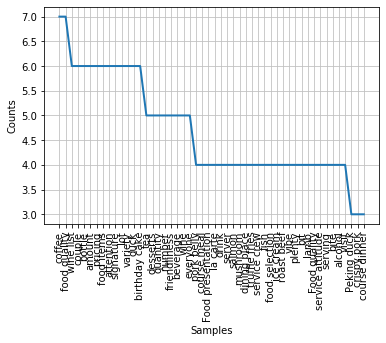

In [27]:
toks_all=[]
for i in range(len(result)):
    toks_all=toks_all+result[i]
fd = nltk.FreqDist(toks_all)
fd.most_common(50)
fd.plot(50)

In [94]:
doc2=nlp(reviews[0])

In [95]:
def cleanup(token, lower = True):
    if lower:
        token = token.lower()
    return token.strip()

labels = set([w.label_ for w in doc2.ents]) 
for label in labels: 
    entities = [cleanup(e.string, lower=False) for e in doc2.ents if label==e.label_] 
    entities = list(set(entities)) 
    print(label)
    print(entities)

ORDINAL
['second', 'first', '2nd']
DATE
['a sad week', 'last 2', 'Saturday', 'Tuesday', 'a long work day', 'one day', 'some days', 'weekly', 'last Wednesday', '1-2 days']
EVENT
['15 Oct.', 'the Rugby World Cup']
TIME
['4 hours', '8pm', 'all evening', 'a late afternoon', 'late afternoon', 'a few minutes later', 'the other night', 'an incredible evening', 'a great night', 'night', 'this afternoon', 'every night', 'a few minutes', 'afternoon', 'every minute', 'seconds', 'this evening', 'Monday evening', 'our first night', 'every hour', 'last minute', 'a memorable night', 'Year end night', 'evening', '5 minutes', '20 minutes']
FAC
['views!Awesome', 'Le Noir MBS', 'again!Nice', 'Le Noir Bar', 'Le Noir', 'Le Noir @ MBS', 'The Le Noir', 'Le NoirCame', 'the Le Noir Bar!', 'Clarke Quay']
LOC
['Le Noir MBS', 'the Singapore River', 'Marina bay', 'Marina Bay Sands', 'Marina', 'Le Noir', 'Marina Bay', 'bar!Great', 'marina bay', 'the marina bay', 'marina bay Le Noir Bar']
NORP
['Spectra', 'Berrylici

In [97]:
for i in range(len(reviews)):
    doc=nlp(reviews[i])
    labels = set([w.label_ for w in doc.ents]) 
    for label in labels: 
        entities = [cleanup(e.string, lower=False) for e in doc.ents if label==e.label_] 
        entities = list(set(entities)) 
        print(label,' ',entities)

ORDINAL   ['second', 'first', '2nd']
DATE   ['a sad week', 'last 2', 'Saturday', 'Tuesday', 'a long work day', 'one day', 'some days', 'weekly', 'last Wednesday', '1-2 days']
EVENT   ['15 Oct.', 'the Rugby World Cup']
TIME   ['4 hours', '8pm', 'all evening', 'a late afternoon', 'late afternoon', 'a few minutes later', 'the other night', 'an incredible evening', 'a great night', 'night', 'this afternoon', 'every night', 'a few minutes', 'afternoon', 'every minute', 'seconds', 'this evening', 'Monday evening', 'our first night', 'every hour', 'last minute', 'a memorable night', 'Year end night', 'evening', '5 minutes', '20 minutes']
FAC   ['views!Awesome', 'Le Noir MBS', 'again!Nice', 'Le Noir Bar', 'Le Noir', 'Le Noir @ MBS', 'The Le Noir', 'Le NoirCame', 'the Le Noir Bar!', 'Clarke Quay']
LOC   ['Le Noir MBS', 'the Singapore River', 'Marina bay', 'Marina Bay Sands', 'Marina', 'Le Noir', 'Marina Bay', 'bar!Great', 'marina bay', 'the marina bay', 'marina bay Le Noir Bar']
NORP   ['Spectr

ORDINAL   ['1st', '80th', 'first', 'First', '9th', 'second', '98th']
PERCENT   ['10%']
DATE   ['weekday', 'today', 'Saturday', 'the day', 'weekend', 'Christmas', 'our 3 year old', 'Tuesday', 'many years ago', 'Last Sunday', 'February', '23 Oct.', '13 July 2019', 'saturday', 'the middle of December of 2019', 'our big day', 'this year', 'week of November, 2019', 'months', '13th July 2019', 'around 2 weeks', 'Today', 'Sunday']
EVENT   ['Lunar New Year']
TIME   ['the night', 'evening', 'this evening', 'about 5 minutes', 'the entire night', '20 minutes', 'last minute', 'a memorable afternoon', 'pricing.a night']
FAC   ['the Peking Duck', 'Fu Lin Man', 'Beijing Roast Duck', 'City Hall MRT', 'Fu Lin Men', 'Lei garden', 'Holidays', 'The Beijing Roast Duck']
LOC   ['Hotel', 'yummy']
PRODUCT   ['Supervisor', 'moodHad', 'Ee Fu noodles', 'reasonable!Good', 'Ee fu noodles']
MONEY   ['about $140', '118']
NORP   ['Peking', 'chinese', 'Chinese', 'staff，the', 'Cantonese', 'oriental decor', 'cantonese',

ORDINAL   ['first', '5th', '17th', 'First', 'second', '2nd', '3rd', 'Second', 'Friendly']
DATE   ['72hrs', 'weekday', 'last Thursday', 'next month', 'you!!Sat 27 April 2019', 'a special date night', 'recent years', 'the next year', 'Saturday', 'Christmas Eve', 'the day', 'Friday', 'two days ago', 'next week', 'the next day', 'Singapore!We', 'This months', 'season', 'the past year', 'yesterday', 'every 2 months', 'the week before', 'Tuesday', 'our 20th', 'a day', 'weekly', 'Monday', 'monthly', 'these days', 'this last Friday', 'a normal day', 'a number of years', 'the first month', 'each month', 'his days', '12 days', 'the weekend', 'S$38', 'the end of the evening', 'every 3 months', 'this year', 'every month', '2015', '4 days', 'April weekend', 'the past 16 years', 'Thursday', 'later this year', 'years']
PRODUCT   ['PEOPLE', 'Michelin', 'room!Great', 'Resturant', 'Flavours', 'teasingI', 'Singapores', 'rib-Super']
TIME   ['only one night', 'this night', 'the next few hours', 'a perfect 

ORDINAL   ['80th', 'Firstly', '60th', '20th', '70th', '50th', '2nd', 'second', '23rd', 'first', 'fourth', '30th', '6th', '10th', '42nd', '28th', 'eighth', '18th', 'seventh', '1st', '5th', 'fifth', 'FIRST', '4th', '9th', 'Second', 'sixth', '24th', 'secondly', 'First', '3rd', 'third', 'Secondly', '8th']
LANGUAGE   ['English', 'japanese', 'Chinese', 'english', 'Cantonese', 'cantonese']
PERCENT   ['10%', '101%', 'about 70%', '50%', 'just about 40%', 'only 20%', '60%', '99%', '10-15%', '100%', '200%', 'less than 20%', '15%']
PRODUCT   ['Sage!askd', 'Chef Tan JQ', 'Jessica', 'hungerA', 'againIt', 'food!Food', 'again!Visited', 'Roast', 'Journey', 'Dominic', 'Natasha', 'worthy!Wide', 'ColonyMy', 'back!Cake', 'Bunch', 'kuehs!Impeccable', 'F1', 'Colony', 'Colony!This', 'Siti', 'Barley', 'the Live Kueh Pati Station', 'higher!This', 'WAY', 'time!Excellent', 'Freshly', 'priceI', 'great!Overall', 'Gourmet', 'SingaporeNice', 'LEE LEE', 'Tiger', 'Raj', 'restaurantHad', 'again!I', 'Colony 10', 'the Che

MONEY   ['192', '60', '#2', '68++', 'about £1', '0822Colony', '10', '98', '80.00', '80 Singapore dollars', '39', '45++', '62', '200', '105', '$$$$', '25', 'every single cent', 'a few dollars', '4', 'just $39', '30++', '80++', 'about $140', 'around 100 US$', 'SGT/76,29$/68,09€', '275.40', 'close to $300', '52', '80', 'over $1000', '92', '310', '60,84 SGT/45,08$/40,24', '54', 'the 100 dollars', '68', '20', '$28 - 40', '3', '300', 'over $10', '$39', '50', '100 US dollars', '88', 'about $230', '48', '40', '$20 - $25', 'about $63', '$$', '88 Singapore dollars', '8', 'two cents', '69', '90', '58++', '88++', '78', '$17', 'about $50']
NORP   ['there~~~~The', 'multi-Asian', 'irish', 'Alaskian', 'Artisian', 'discount!Would', 'experience!A', 'Balinese', 'american', 'Indonesian', 'Host', 'asian', 'choicesOur', 'Alaskan', 'Traditional Singaporean', 'Italian', 'suggestions!Special', 'Asian', 'Sunset', 'indian', 'japanese', 'JinXian', 'Thai', 'Singaporean', 'Alaskan Crab', 'again!!We', 'western', 'Ke

ORDINAL   ['80th', '7th', 'Firstly', '68th', '50th', '70th', '54th', '2nd', 'second', '75th', 'Thirdly', 'time!Highly', '81st', 'first', 'fourth', '30th', '1st', '62nd', 'Second', '40th', 'Third', '5-set', 'First', '3rd', 'third']
LANGUAGE   ['english', 'English', 'cantonese', 'Mandarin']
PERCENT   ['50-60%']
DATE   ['30 Oct.', '2 years ago', 'the 3rd of January', 'SG$80', '2008', 'Jan.', 'some 3-4 years', 'Christmas', 'many months', 'Summer Pavilion', 'a weekend', '17 September 2019', '13th Aug.', 'annual', 'the last 2 weeks', 'years ago', 'that day', 'their golden years', 'last Sunday', 'the decades', 'about yesterday', '2 year old', 'Last weekend long holidays', '8 months', 'our special day', '2015', '7 months', '5 years old', 'a year or so ago', 'the same week', 'weekday', 'Saturday', 'end-July', '2 months ago', 'over 10 years', 'a 2nd', 'the week before', '2019', 'weeks', 'this Feb 2017', 'December 2019', 'Year 2018', 'every year', 'Last December', 'our big day', 'every 3 months',

ORDINAL   ['1st', 'first', '5th', '13th', 'First', 'second', '3rd', '21st']
PERCENT   ['100%']
DATE   ['2009', 'every other week', '10 days ago', 'a tough two weeks', '4 nights', 'earlier in the day', 'all day', 'the last three nights', 'some days', 'more than 20 years', 'Sunday', 'a long day', 'more!We', 'the last 2 months', 'August', 'years']
PRODUCT   ['friendlyI', 'the Zazz Salad', 'recomendedI', 'the Ibis Bencoolen', 'Margarita', 'Fettuccini', 'Bismarck', 'burratta', 'place!This', 'Zazz Pizzas', 'Princi']
TIME   ['40 minutes', 'last night', '30 minutes', 'a hot night', 'our first evening', 'about five minutes', 'a couple nights', 'mid-evening', 'around noon', 'two night in a row', 'only 5 minutes', 'afternoon']
FAC   ['Burrata', 'more!Stayed', 'night!Small', 'Parma ham', 'parma ham', 'the Angel Hair Pasta Prawns', 'rocket n']
LOC   ['Europe', 'premises', 'Asia', 'TripAdvisor']
MONEY   ['200/-', '133', 'only $6', '1.10.Simply', '22']
NORP   ['Sicilian', 'Diavola', 'Zazz', 'Roman', 

ORDINAL   ['4yr', 'first', 'Firstly', '7th', '50th', 'First', 'second', '2nd', '37th', '4th', 'third', 'Thirdly', 'Secondly', 'Third']
LANGUAGE   ['English', 'Fettuccine', 'Mandarin']
PERCENT   ['100%', '25%', '15%']
DATE   ['20 December', 'between 28 and 50 S$', 'those nights', 'June', 'weekend', 'Just a day ago', 'Friday', 'n’t fry eggs!We', 'a 4 week holiday', 'early July', 'a busy day', 'the actual day', 'january', 'Christmas', 'our 3 year old', 'one day', '6 June 2018', 'the last 3 years', 'this day', '30th December 2018', 'last Sunday', '7', 'last week', 'a few months ago', '2 year old', '2015', '27th May 17', 'the last week', 'Last year', '7-30', 'April 2nd', 'weekday', '10 days', 'recent years', 'Saturday', 'SG.After 2+ weeks', '7th month', 'diner!Been', 'home!We', 'six months', 'under 10', '11th March', 'our day', 'my day', 'The week', 'a long day', 'February 7th', 'two weeks', 'almost 6 months', 'Thursday', 'the 7 year anniversary', 'several nights', 'a few days', '2 nights l

ORDINAL   ['1st', 'first', '5th', '50th', '9pm', '11th', '21st', '12th', 'second', 'First', '9th', '2nd', 'third', 'Second', 'Third']
LANGUAGE   ['English']
PERCENT   ['100%', '95%', '20%', '90%']
DATE   ['summer', 'weekday', 'only 2 years old', 'August 2016', 'Saturday', '2 years', 'the day', "New Years'", 'Friday', 'Summer', '20 years', 'Christmas', 'the busy holiday season', 'about 4 months ago', 'a weekend', 'date nights', '28 Feb 2020', 'one day', 'yearly', 'Monday', 'dish!Today', 'every 6 months or so', 'September 2018', 'this world!We', 'that day', 'our day', 'saturday', 'late sept 2017', 'last Sunday', 'last week', 'this year', 'my 7 years', '2 year old', '1 week', 'our 4 year old', 'every week day', 'winter', 'Sunday', 'the same week']
PRODUCT   ['again!Celebrated', 'the Chef of Joie', 'Michelin', 'experience!Joie', 'Elemen', 'Dozo', 'F1']
TIME   ['Monday night', 'a rainy afternoon', '11pm', 'our night', 'night', 'a great night', 'over 45 minutes', 'that night', 'afternoon', '

ORDINAL   ['1st', 'first', '30ml', 'fourth', '10th', 'First', 'second', '2nd', '56th', '4th', 'third', 'Second', 'Secondly']
LANGUAGE   ['English', 'Japanese']
PERCENT   ['as much as 20%', '10 to 20%', 'the hundred percent', '100%', '15%']
PRODUCT   ['Jap', 'menuI', 'Perfect Storm', 'delectable!Individual', 'again!Freshest', 'eaterWe', 'Bess', 'Perfect Storm(lil', 'B1', '200++', 'JW Marriott at Beach Road', 'gesture!Love', 'deserts!Excellent', 'Flounder', 'helpful!Really', 'SGD255', 'Beauty', 'meal!Located', 'Chicken', 'Sushi', 'amazing~']
DATE   ['10 days', 'today', 'Saturday', '2 years', 'the day', '2 weeks ago', 'this month', 'the past month', 'Christmas', 'yesterday', '06 Dec 2019', 'Sept 7th', 'some weeks ago', 'week days', 'Monday', 'next day', 'a week', 'daily', '5', 'last Saturday', 'only 3 days', 'Christmas Day', 'a half year ago', '2 months', 'April', 'that day', 'last Friday', 'my day', 'the weekend', 'a few days early', 'one year old', 'last month', 'last week', '3 days', '

ORDINAL   ['7th', 'Firstly', '50th', '2nd', 'second', 'Thirdly', 'first', '14th', '10th', 'Indulge', '6th', '1st', '5th', 'again!A', '4th', '1hr', 'Second', '40th', '31st', '24th', 'First', '3rd', '25th', 'third', '21st', 'Secondly']
LANGUAGE   ['meal!Felt', 'English']
PERCENT   ['10%', 'only 10%', '50%', '70%', 'less than 50%', 'about 80%', '100 %', '40 %', '80%', 'hundred percent', 'only 80%', 'about 50%', '90%', '100%', '75%', 'about 60%']
DATE   ['last Thursday', 'next month', '2 May.', 'those days', 'Friday', 'a week ahead', 'the weeks before', 'Christmas', '4-6 weeks', 'our 11th year anniversary', 'most days', 'one day', 'the first few months', 'August 2017', '4th October 2014', 'Last Friday', 'these days', '3 and 6 year old', 'my 1 year anniversary', 'each month', 'only 8 months', '6th week', 'every 3/4 months', 'between one to two hours', 'that day', 'the past few years', 'too!Highly', 'lvl 2', 'many years back', 'five plus years', 'last week', 'Everyday', 'a month ago', 'a few

ORDINAL   ['second', 'first', '11th']
PERCENT   ['100%', '50%']
EVENT   ['New Year', 'the cold cup', 'Black Pepper Crab Pasta']
DATE   ['weekday', '4 nights', 'the day', 'July', 'month of July', '1st Jul', 'Singapore!We', 'a busy day', 'march', 'Tuesday', '19 days', 'a couple of days later', 'Daily', 'weekly', 'Monthly', 'at least every month', 'Monday', 'daily', 'that day', 'a long day', 'last week', 'last saturday', 'the month', 'all day', 'Wednesday', 'Thursday']
TIME   ['the night', 'night', '7pm', 'the evening', 'date night', 'a short moment', 'a chill night', '3 nights', 'Monday night', 'a busy night', 'around 7pm', '2:30 pm', 'every evening', 'lunch hours']
FAC   ['Outram Park Mrt', 'again!Located', 'Sweet', 'Outram Park MRT', 'the Bak Kut Teh Risotto', 'Outram Road', 'outram park', 'the Otah Hamachi Collar', 'Great Value', 'Bak Kut Teh risotto']
LAW   ['the Kurobuta Pork Chop']
LOC   ['east', 'Chope', 'west', 'Bak']
MONEY   ['only 6 dollars', 'only $6', '18', '20', 'only $6/cup

ORDINAL   ['first']
DATE   ['mid-September', 'today', 'Saturday', 'the day', 'Friday', 'the last 4 years', 'the days', 'yesterday', 'our last 2 days', 'ol’ days', 'Tuesday', 'a week later', 'the same day', '2pax', 'that day', '3 months ago', 'line!Hands', '7', 'another day', '2015', 'November 2017', 'Sunday']
PRODUCT   ['Gokuls', 'Paneer', 'againWe', 'banana flower vadai', 'visit!Restaurant', 'Hema', 'servedThe', 'authenticA', 'Greenleaf']
TIME   ['10 minutes', 'seconds', 'Just few minutes', 'tonight', 'the evening', 'only 5 minutes']
FAC   ['Cuff Road', 'Valentines Day', 'Serangoon Road', 'Komalas', 'Grama Bhojanam', 'Little India', 'Greenleaf Cafe', 'Bukit Timah Road', 'Thali', 'Greenleaf']
LOC   ['Southern India', 'the Green Leaf Cafe', 'Green Leaf', 'Little India', 'the Greenleaf Cafe', 'Greenleaf']
MONEY   ['30SGD', '#Indian #', '13', '15', '12$', '12', '12 dollars', '7', 'only $12']
NORP   ['best!I', 'Southern', 'south Indian', 'placeThe', 'French', 'Indian', 'indian', 'vegetaria

ORDINAL   ['first', '5th', 'fourth', '60th', 'back!First', 'fifth', '20yr', 'First', 'second', '2nd', '3rd', '25th']
LANGUAGE   ['English', 'Mandarin']
PERCENT   ['100%', '20 percent']
DATE   ['10 days', '05 Jun', 'today', 'Saturday', 'the day', 'Friday', '6', 'early January 2019', '1920s', '4', '70', 'May 7, 2019', '7 February 2020', 'several months ago', '2019', '5 June', '189764', 'one week', '5', 'our day', 'days', 'a couple of weeks', 'last month', 'last week', 'the end of the evening', 'below 12', 'this year', 'the old days', 'a few days ago', 'only one day', 'Today', 'new year', 'our 1st year', 'Sunday', '3 weeks', 'weeks ago']
EVENT   ['the Lunar New Year', 'The xiao long bao', 'restaurant!Thank', 'Chinese New Year', 'New Year', 'the moon cake festival', 'new year', 'the Chinese New Year']
TIME   ['45 minutes', 'Sunday night', '6:30', 'Night', 'A whole night', 'a good night', 'our night', 'a fantastic evening', 'night', 'nights', 'certain hours', 'that night', 'a busy night', '

ORDINAL   ['1st', 'first', 'Firstly', '10th', 'First', 'second', '6th', '2nd', '3rd', 'third', 'Second', 'Secondly', '15th']
LANGUAGE   ['English']
PERCENT   ['50%']
DATE   ['next month', '5 months later', 'every week', '2 years ago', 'today', 'Saturday', '2016', 'S$ 45', 'the day', 'Friday', '29 Oct and 28 Nov.', 'next week', 'over weeks', 'the next day', 'few weeks', 'the last 12 months', 'Singapore!We', 'a couple date', '4', 'Christmas', '50 year old', '00s', 'the end of the night', 'tomorrow', 'few months ago', 'yesterday', 'Sundays', 'seven days', 'a year ago', 'a weekend', 'ten years age', 'Yesterday', 'weekly', 'Monday', 'daily', 'last Saturday', 'a month later', 'July 2013', 'that day', '3 month old', '12mths ago', 'the weekend', '1999', "' day", 'the last 6', 'last week', 'daytime', 'this year', 'a couple of years', 'October', 'Monday - Saturday', 'a year', 'only & week', 'many years', 'the 15th of May', 'winter', 'Sunday', 'Thursday', 'sunday', 'the 80s, 90s', 'the few days',

ORDINAL   ['1st', 'first', '5th', '7th', 'Firstly', 'sixth', '50th', '30th', '6th', 'First', 'second', '4th', '2nd', '3rd', 'third', 'Second', 'seventh']
LANGUAGE   ['mandarin', 'English']
PERCENT   ['10%', '6 - Strawberries & Cream']
DATE   ['the past 2 months', 'May', 'Friday', 'December Thursday', 'a hard day', 'my last day', 'Christmas', 'a busy day', 'lounge!This month', '10 years', 'Negroni week', 'a weekend', 'one day', 'mid-may', 'that day', 'Saturdays', 'three days', 'last week', 'the 2nd', 'weekday', 'Saturday', '3 months', '2 week', 'boxing day', 'a public holiday', '2019', 'a week later', 'the past weeks', 'weekdays', 'weekend hightea', 'my day', 'around two days', 'saturday', 'the past 5 years or so', 'my 8 months old', 'a long day', 'the holidays', 'one a few days ago', '3 weeks', 'a few days', 'Summer', '6th/7th', 'year', 'day', 'the first day', 'a few days weekend', 'the month of December', 'a week', '2 Feb 2019', 'friday', 'our 23rd', 'my weekend', 'the 80s', 'the week

ORDINAL   ['1st', 'first', '68th', 'fourth', '50th', '20th', 'fifth', '30th', '85th', '2nd', 'second', 'First', '4th', 'Third']
PERCENT   ['100%', '50%', '15%']
DATE   ['every week', '300 days', 'May', 'June', 'weekend', 'no doubt!We', 'Friday', 'our 5 year old', "'s day", 'Christmas', 'last eve', 'Sundays', 'one day', 'these days', 'that day', 'Dec 2017', 'a rainy day', 'a few days time', 'last week', 'a few months', '7 August', 'the last week', 'Last year', 'weekday', 'Saturday', 'meal!We', '10 year old', '2017', 'Autumn', 'season', 'weekday and weekend', 'service!We', 'August 2018', 'few month', 'a long day', 'the age of nine', 'the festive season', 'the past 15 years', 'a very busy day', '8', 'Thursday', 'a few days later', '1030', 'more than forty years', 'the Day', '5 week', 'Friday 16th November', 'their first day', 'February', 'daily', '1st May 2018', '2010', '3 year old', '9 year old', 'our year', 'another day', 'this year', 'sunday', 'the past years', 'today', 'the day', 'two

ORDINAL   ['1st', 'first', '5th', '7th', 'Firstly', '1130pm', 'them!First', 'First', 'second', '2nd', '4th', '1045am', 'third', '5pm', 'Second']
LANGUAGE   ['english', 'Hygenic', 'English']
PERCENT   ['100%', '7%', '10%']
DATE   ['every week', 'a few years ago', 'June', 'my first day', 'weekend', 'Friday', 'fifty years', 'each of those days', 'a 2 week', '60 year', 'their first weekend', '15+ years', 'our 4 day holiday', 'a few years before', 'this past weekend', 'Sundays', 'the 2 weeks', 'a weekend', 'many years ago', 'one day', 'Yesterday', 'a week end', 'these days', 'this day', 'some other days', 'a couple of days', 'Every day', 'about 18 months ago', 'the past week', 'September 2018', 'Tuesdays', 'that day', 'almost every week end', 'last Sunday', 'Everyday', 'last week', 'our holiday', 'a few months', 'SingaporeThis week', 'a few months ago', 'last saturday', 'our two week', 'the past few months', '4 days', '80s', 'S$', '1977', 'each day', 'Last year', 'Friday Saturday and Sunday

ORDINAL   ['1st', 'AWESOOOOMEFirst', 'first', 'Firstly', '16th', '2nd', 'second', '4th', 'First', 'Thirdly', '23rd', '40th', 'Secondly']
LANGUAGE   ['English', 'Satish']
PERCENT   ['10%', '7%', '50%', '100 %', '100%', 'n’t 100%']
DATE   ['2 years ago', 'May 2014', 'weekend', 'those days', 'A year', 'Friday', 'yesterday , Friday', 'a 2 week', 'five day', '4 month old', '10 odd pax', 'Christmas', 'my last day', 'Sundays', 'almost 5 years ago', 'about 4 years ago', 'Yesterday', 'January 18', 'next day', 'these days', 'an exhausting day', 'last week', 'a few months', 'a couple of years', 'the middle of the day', '8 months', '2 year old', 'past 3 weeks', '2 and day', '1980', 'their end of year', 'our last day', 'each day', 'July last year', 'weekday', 'rainy day', 'about our younger days', 'February 2017', '3 years', '16th July 2019', 'February 17', 'Saturday', 'the day before', 'September', 'cheating day', 'a public holiday', 'the mid day', 'week', 'all day long', 'only 1015', 'some days',

ORDINAL   ['second', 'first']
PERCENT   ['100%']
DATE   ['daily', '👍 1st', 'yummy!My 2nd', 'every week', 'work!We', 'two days in a row', 'Sunday']
TIME   ['8pm', 'peak hours', '11 am', 'their operating hours', '3.30 pm', '7.30 pm', '12 hour']
FAC   ['Sim Lim', 'neighborhood!Cute', 'the Mu Ping', 'Sim Lim Square', 'Rochor MRT Station']
LOC   ['the Northern Thai Pork Rib', 'Sim Lim', 'the Northern Thai', 'the Northern Thai Rib Soup']
LAW   ['Premium Noodles - Big']
MONEY   ['4', '10.80', '2', '5.80', '23', '4.00', '3', '5.30', '30', '7', '4.20', '4.50),the', '3.00', 'under $10']
NORP   ['American', 'yummy thai', 'Basil', 'Northern Thai', 'chor', 'ba-chor', 'Mexican', 'The Bak Chor Mee', 'tastyThe', 'thai', 'Chinese', 'Chor', 'Authentic Thai', 'Rochor', 'basil', 'Thai']
GPE   ['Bangkok', 'Thurs', 'yummy', 'Mango', 'Soi Aroy', 'sg', 'Singapore', 'thailand', 'us', 'Shiok', 'Thailand']
CARDINAL   ['1', '2', 'Almost 3', 'Just one', '5/5', 'One', 'FIVE', '3', '10/10', 'one', '6']
WORK_OF_ART  

ORDINAL   ['7th', 'Firstly', '60th', '20th', '2nd', 'second', 'first', '28th', '11th', '4th', 'Second', '40th', '15th', 'Third', '19th', 'First', '3rd', 'third', 'Secondly']
LANGUAGE   ['English', 'french']
PERCENT   ['Almost 100%', 'the 1%']
DATE   ['a few years ago', 'May', '2016', 'weekend', 'Friday', 'a working day', 'the last 12 months', '3 weeks ahead', 'Christmas', '1 Year Anniversary', 'several weeks ahead', 'four days', '10 years', 'a weekend', 'the last 3 years', 'two nights earlier', 'annual', 'the opening week', 'next November', 'that day', 'one mid week', '7', 'last week', 'a one week', 'a few months', '2015', '23 November', 'seven months ago', 'recent years', 'Saturday', 'A week', 'a long week', '2017', 'four weeks', '2019', 'the last year', '1 month', 'the whole week', 'weeks', '2016Aug a year ago', 'his days', '3', 'a very fine day', 'a three month', 'the festive season', 'some day', 'next year', 'This year', 'month', 'the season', 'last Wednesday', 'year', 'Three days'

ORDINAL   ['Firstly', '60th', '50th', '2nd', 'second', 'first', 'Fourth', '1st', '55th', 'fifth', '4th', 'Second', 'Third', '15th', 'sixth', 'First', '3rd', '25th', '8th']
LANGUAGE   ['English', 'Chinese', 'Japanese', 'Mandarin', 'english', 'Filipino']
PERCENT   ['25%', '15%', '17%', 'the remaining 85%', '17 %', '20%', '30%']
DATE   ['every 6 months', 'our 2nd day', 'June', 'authenticity!Today', '4 nights', 'August 2016', 'Friday', 'a Sunday', '2011', '4 June 2016', 'week-long', 'Christmas', 'four days', 'january', 'Sundays', 'thursday to weekend', 'a weekend', 'early June', 'annual', 'Last Friday', 'week days', 'three consecutive days', 'a couple of days', 'about a week', 'more than a decade', 'that day', '5 year old', 'the Christmas weekend', 'the end of the evening', 'last week', '8 days', '2015', 'May 2015', '4 days', 'weekday', '10 days', 'mid-January', 'back!In', 'over a decade', 'Nov 15', 'Saturday', 'the second week', 'the choice!We', 'first week', '2019', 'couple of days ago',

In [31]:
list(doc.sents)

[I came here with some friends the other night, i can definitely say the food is amazing, especially as we were celebrating a birthday, the staff member, i believe his name is Syafiq, had organized a cake platter for the birthday girl.,
 The music was amazing and the sunset view was stunning.,
 Great service!!,
 The hostess annabell sat us down at a really nice table, and gave us some recommendations around the area for afterwards.,
 Will definitely come back again!Wonderful atmosphere very small place .,
 Excellent foods and service.,
 Very nice lighting.,
 I will be back Nice services, good meal.,
 Small place, but intimate.,
 A nice view to the water.,
 Washroom was in maintenance and we have been directed to mall.,
 Our first bar stop in Singapore and it did not disappoint!,
 The lovely staff offered so much advice on the area and helped us plan the best night around Singapore!,
 Everyone needs to try their Berrylicious cocktail, wow!
 ,
 Thanks so much to Annabelle!We had just a g

In [29]:
all_tags = {w.pos: w.pos_ for w in doc}
print(all_tags)

{95: 'PRON', 100: 'VERB', 86: 'ADV', 85: 'ADP', 90: 'DET', 92: 'NOUN', 84: 'ADJ', 97: 'PUNCT', 87: 'AUX', 98: 'SCONJ', 96: 'PROPN', 89: 'CCONJ', 94: 'PART', 91: 'INTJ', 103: 'SPACE', 93: 'NUM', 99: 'SYM', 101: 'X'}


# Build labelled corpus

In [13]:
testdoc=nlp(reviews[0])

In [14]:
print(list(list(testdoc.sents)[0]))

[I, came, here, with, some, friends, the, other, night, ,, i, can, definitely, say, the, food, is, amazing, ,, especially, as, we, were, celebrating, a, birthday, ,, the, staff, member, ,, i, believe, his, name, is, Syafiq, ,, had, organized, a, cake, platter, for, the, birthday, girl, .]


In [15]:
s1=list(testdoc.sents)[0]
print(s1)

I came here with some friends the other night, i can definitely say the food is amazing, especially as we were celebrating a birthday, the staff member, i believe his name is Syafiq, had organized a cake platter for the birthday girl.


In [22]:
s_text=[]
for token in s1:
    s_text.append(token.text)
a = [x for x in s_text if x in food]
print(a)
if len(a)==0:
    print('skip')

[]
skip


In [122]:
svalue=[]
for i in range(len(s1)):
    svalue.append('s1')
    
wvalue=list(list(testdoc.sents)[0])

pvalue=[]
for token in list(testdoc.sents)[0]:
    pvalue.append(token.tag_)

testf=['cake']
tvalue=[]
for token in list(testdoc.sents)[0]:
    if token.text in testf:
        tvalue.append('B-f')
    else:
        tvalue.append('O')

In [125]:
testdict={'Sentence #':svalue,'Word':wvalue,'POS':pvalue,'Tag':tvalue}
testdf=pd.DataFrame(testdict)
testdf.head()

,Sentence #,Word,POS,Tag
0,s1,I,PRP,O
1,s1,came,VBD,O
2,s1,here,RB,O
3,s1,with,IN,O
4,s1,some,DT,O


In [18]:
purefood=pd.read_excel('/Users/lin/Desktop/food.xlsx')
purefood.head()

,name
0,crystal noodles salad
1,red roast duck curry
2,thai coconut soup with chicken
3,glass of ochagavia merlot
4,tom yam kung


In [19]:
food=list(purefood['name'])
print(food)

['crystal noodles salad', 'red roast duck curry', 'thai coconut soup with chicken', 'glass of ochagavia merlot', 'tom yam kung', 'olive fried rice', 'fried chic wings', 'mango glutinous rice with ice cream', 'mango salad', 'kurobuta pork', 'fried prawn', 'coconut soup', 'grilled kurobuta pork collar', 'durian sticky rice', 'cocktail', 'pizza', 'beer', 'whiskey', 'chicken', 'mandi rice', 'layer juice', 'saudi kabsah rice', 'mango juice', 'shawarmas', 'briyani', 'chicken soup', 'chicken', 'xo carrot cake', 'peking duck', 'noodles', 'kurobuta pork', 'prawn', 'yam basket', 'steam garouper fish', 'fried mee sua', 'orh nee', 'tofu', 'lobster pasta', 'potato bread', 'crab', 'oysters', 'ohni beef', 'pasta', 'foie gras', 'petit fours', 'chicken soup', 'chicken', 'xo carrot cake', 'peking duck', 'noodles', 'kurobuta pork', 'prawn', 'yam basket', 'steam garouper fish', 'fried mee sua', 'orh nee', 'sweet crepes', 'galettes', 'emmental cheese', 'ham', 'escargot', 'vanilla ice cream', 'prawn', 'sala

In [46]:
svalue=[]
wvalue=[]
pvalue=[]
tvalue=[]

ct=0
for i in range(len(reviews)):
    
    doc=nlp(reviews[i])
    
    for j in range(len(list(doc.sents))):
        s=list(doc.sents)[j]
        s_text=[]
        for token in s:
            s_text.append(token.text)
        a = [x for x in s_text if x in food]
#         print(a)
        if len(a)==0:
            continue
        
        ct=ct+1        
#         svalue=[]
        for k in range(len(s)):
            svalue.append('s'+str(ct))
        wvalue=wvalue+list(list(doc.sents)[j])
#         pvalue=[]
        for token in list(doc.sents)[j]:
            pvalue.append(token.tag_)
#         tvalue=[]
        for token in list(doc.sents)[j]:
            if token.text in food:
                tvalue.append('B-f')
            else:
                tvalue.append('O')
                
    print(i+1,' restaurants finished.')

1  restaurants finished.
2  restaurants finished.
3  restaurants finished.
4  restaurants finished.
5  restaurants finished.
6  restaurants finished.
7  restaurants finished.
8  restaurants finished.
9  restaurants finished.
10  restaurants finished.
11  restaurants finished.
12  restaurants finished.
13  restaurants finished.
14  restaurants finished.
15  restaurants finished.
16  restaurants finished.
17  restaurants finished.
18  restaurants finished.
19  restaurants finished.
20  restaurants finished.
21  restaurants finished.
22  restaurants finished.
23  restaurants finished.
24  restaurants finished.
25  restaurants finished.
26  restaurants finished.
27  restaurants finished.
28  restaurants finished.
29  restaurants finished.
30  restaurants finished.
31  restaurants finished.
32  restaurants finished.
33  restaurants finished.
34  restaurants finished.
35  restaurants finished.
36  restaurants finished.


In [47]:
for i in range(len(tvalue)):
    if tvalue[i]=='B-f':
        if tvalue[i+1]=='B-f':
            tvalue[i+1]='I-f'

In [48]:
corpusdict={'Sentence #':svalue,'Word':wvalue,'POS':pvalue,'Tag':tvalue}
corpusdf=pd.DataFrame(corpusdict)
corpusdf.head()

,Sentence #,Word,POS,Tag
0,s1,Everyone,NN,O
1,s1,needs,VBZ,O
2,s1,to,TO,O
3,s1,try,VB,O
4,s1,their,PRP$,O


In [49]:
corpusdf.to_csv('labelled_corpus.csv',index=None,encoding=None)

# Statistical-based NER (using the labelled corpus built)

In [50]:
import tensorflow as tf
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Hyperparams
BATCH_SIZE = 512
EPOCHS = 5
MAX_LEN = 50
EMBEDDING = 40

In [52]:
data=pd.read_csv('/Users/lin/Documents/plpCA/labelled_corpus.csv')
data.head()

,Sentence #,Word,POS,Tag
0,s1,Everyone,NN,O
1,s1,needs,VBZ,O
2,s1,to,TO,O
3,s1,try,VB,O
4,s1,their,PRP$,O


In [53]:
print("Number of sentences: ", len(data.groupby(['Sentence #'])))

words = list(set(data["Word"].values))
n_words = len(words)
print("Number of words in the dataset: ", n_words)

tags = list(set(data["Tag"].values))
print("Tags:", tags)
n_tags = len(tags)
print("Number of Labels: ", n_tags)

Number of sentences:  8901
Number of words in the dataset:  9675
Tags: ['I-f', 'B-f', 'O']
Number of Labels:  3


In [66]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None
        
getter = SentenceGetter(data)
sent = getter.get_next()
sentences = getter.sentences

In [71]:
indexword = {w: i + 2 for i, w in enumerate(words)}
indexword["UNK"] = 1
indexword["PAD"] = 0
idx2word = {i: w for w, i in indexword.items()}
print("The word pizza is identified by the index: {}".format(indexword["pizza"]))
indextag = {t: i+1 for i, t in enumerate(tags)}
indextag["PAD"] = 0
idx2tag = {i: w for w, i in indextag.items()}
print("The labels B-f(which defines food) is identified by the index: {}".format(indextag["B-f"]))

The word pizza is identified by the index: 2335
The labels B-f(which defines food) is identified by the index: 2


In [72]:
from keras.preprocessing.sequence import pad_sequences
X = [[indexword[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=MAX_LEN, sequences=X, padding="post", value=indexword["PAD"])
y = [[indextag[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=indextag["PAD"])

from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags+1) for i in y]

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape

print('Raw Sample: ', ' '.join([w[0] for w in sentences[0]]))
print('Raw Label: ', ' '.join([w[2] for w in sentences[0]]))
print('After processing, sample:', X[0])
print('After processing, labels:', y[0])

Raw Sample:  Everyone needs to try their Berrylicious cocktail , wow ! 


Raw Label:  O O O O O O B-f O O O O
After processing, sample: [3903 4323 9492 2131 4429 1618 8031 2413  417 2871 9070    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
After processing, labels: [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.

In [70]:
from keras.models import Sequential,Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF

In [59]:
def build_embedding_bilstm2_crf_model():
    model = Sequential()
    model.add(Embedding(input_dim=n_words+2, output_dim=EMBEDDING, input_length=MAX_LEN))
    model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
    model.add(Dropout(0.1))
    model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
    model.add(Dropout(0.1))
    model.add(TimeDistributed(Dense(n_tags+1)))
    crf_layer = CRF(n_tags+1)
    model.add(crf_layer)
    model.compile('rmsprop', loss=crf_layer.loss_function, metrics=[crf_layer.accuracy])
    return model

In [60]:
model=build_embedding_bilstm2_crf_model()

/Users/lin/anaconda3/envs/plpca/lib/python3.7/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/Users/lin/anaconda3/envs/plpca/lib/python3.7/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 40)            387080    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 50, 100)           36400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 100)           60400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 50, 4)             404       
_________________________________________________________________
crf_2 (CRF)                  (None, 50, 4)             44        
Total para

In [62]:
history = model.fit(X_tr, np.array(y_tr), batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, verbose=2)

Train on 7209 samples, validate on 801 samples
Epoch 1/5
 - 21s - loss: 0.7187 - crf_viterbi_accuracy: 0.6563 - val_loss: 0.3784 - val_crf_viterbi_accuracy: 0.8748
Epoch 2/5
 - 12s - loss: 0.3029 - crf_viterbi_accuracy: 0.9201 - val_loss: 0.2548 - val_crf_viterbi_accuracy: 0.9309
Epoch 3/5
 - 12s - loss: 0.2299 - crf_viterbi_accuracy: 0.9456 - val_loss: 0.1988 - val_crf_viterbi_accuracy: 0.9593
Epoch 4/5
 - 13s - loss: 0.1922 - crf_viterbi_accuracy: 0.9517 - val_loss: 0.1686 - val_crf_viterbi_accuracy: 0.9606
Epoch 5/5
 - 13s - loss: 0.1622 - crf_viterbi_accuracy: 0.9599 - val_loss: 0.1494 - val_crf_viterbi_accuracy: 0.9581


In [63]:
pred_cat = model.predict(X_te)
pred = np.argmax(pred_cat, axis=-1)
y_te_true = np.argmax(y_te, -1)

In [64]:
from sklearn_crfsuite.metrics import flat_classification_report

pred_tag = [[idx2tag[i] for i in row] for row in pred]
y_te_true_tag = [[idx2tag[i] for i in row] for row in y_te_true] 

report = flat_classification_report(y_pred=pred_tag, y_true=y_te_true_tag)
print(report)

              precision    recall  f1-score   support

         B-f       0.00      0.00      0.00      1244
         I-f       0.00      0.00      0.00        72
           O       0.89      1.00      0.94     14811
         PAD       1.00      0.98      0.99     28423

    accuracy                           0.96     44550
   macro avg       0.47      0.49      0.48     44550
weighted avg       0.93      0.96      0.94     44550



/Users/lin/anaconda3/envs/plpca/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
#Due to time constraints, it is not possible to do the name entity recognition tasks to all categories except food category,
#Resulting in very sparse data, so the model accuracy is very low.